In [2]:
%pip install gradio mediapipe opencv-python matplotlib

  Using cached mediapipe-0.10.14-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached jax-0.4.28-py3-none-any.whl.metadata (23 kB)
  Using cached jaxlib-0.4.28-cp312-cp312-win_amd64.whl.metadata (1.8 kB)
  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached cffi-1.16.0-cp312-cp312-win_amd64.whl.metadata (1.5 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
Using cached mediapipe-0.10.14-cp312-cp312-win_amd64.whl (50.8 MB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
Using cached jax-0.4.28-py3-none-any.whl (1.9 MB)
   ---------------------------------------- 0.0/51.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/51.5 MB ? eta -:--:--
   ------------------

In [3]:
import cv2
import mediapipe as mp
import numpy as np

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame=cap.read()
    
    cv2.imshow('Selfie Seg' , frame)
    
    if cv2.waitKey(10) & 0xFF ==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

In [5]:
mp_selfie = mp.solutions.selfie_segmentation

In [9]:
cap = cv2.VideoCapture(0)
with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
    while cap.isOpened():
        ret, frame=cap.read()
        
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable = True

        
        cv2.imshow('Selfie Seg' , frame)
        
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    
cap.release()
cv2.destroyAllWindows()

In [10]:
res.segmentation_mask

array([[1.0310769e-33, 9.2796922e-34, 5.1553844e-34, ..., 1.0029908e-36,
        2.0059821e-37, 0.0000000e+00],
       [6.6375242e-27, 5.9737713e-27, 3.3187621e-27, ..., 1.8223285e-29,
        3.6446592e-30, 0.0000000e+00],
       [1.8437564e-26, 1.6593806e-26, 9.2187818e-27, ..., 5.0620228e-29,
        1.0124052e-29, 0.0000000e+00],
       ...,
       [4.3181620e-22, 3.8863458e-22, 2.1590810e-22, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.8136280e-21, 1.6322651e-21, 9.0681401e-22, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.5908971e-21, 2.3318074e-21, 1.2954485e-21, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [11]:
from matplotlib import pyplot as plt
from matplotlib import gridspec

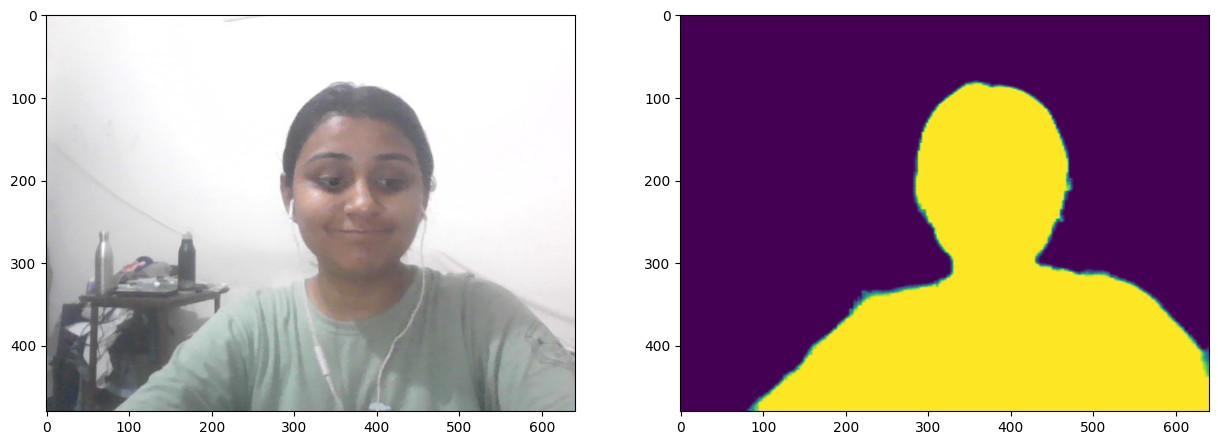

In [16]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(frame)
ax1.imshow(res.segmentation_mask)
plt.show()

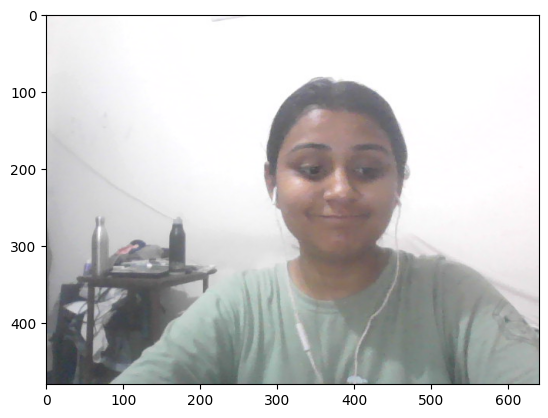

In [17]:
plt.imshow(frame)

In [18]:
background = np.zeros(frame.shape, dtype=np.uint8)
mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 


In [19]:
np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 


array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [20]:
segmented_image = np.where(mask, frame, background)

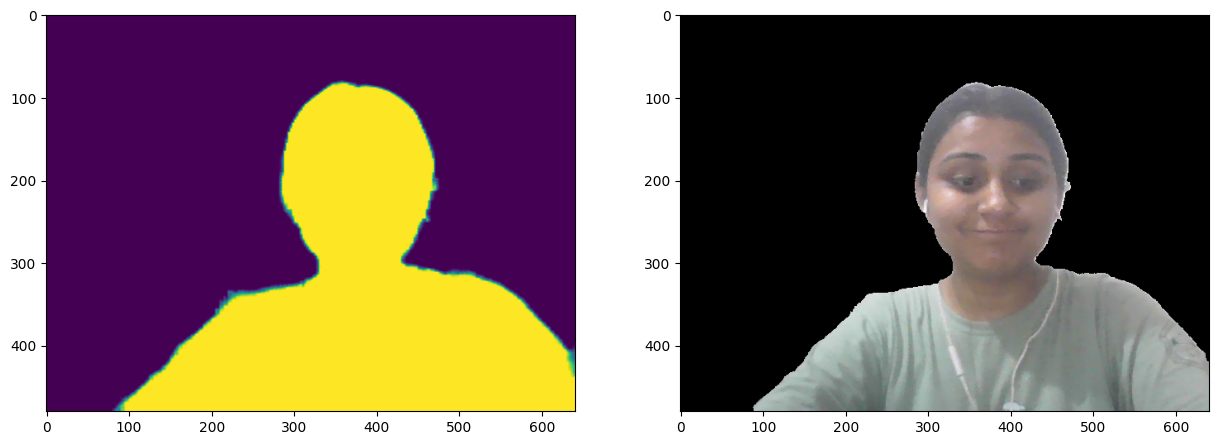

In [21]:
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()


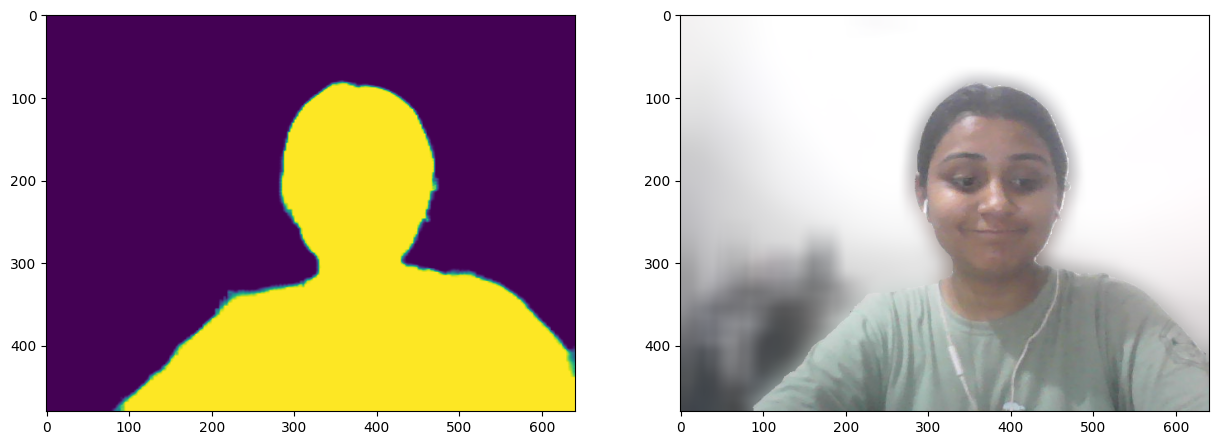

In [23]:
segmented_image = np.where(mask, frame, cv2.blur(frame,(40,40)))
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

In [22]:
import gradio as gr

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
def segment(image): 
    with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        return np.where(mask, image, cv2.blur(image, (40,40)))


In [29]:
webcam = gr.Image(height=640, width=480, sources="webcam")

In [32]:
webapp = gr.Interface(fn=segment, inputs=webcam, outputs="image")

In [38]:
webapp.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

To create a public link, set `share=True` in `launch()`.
